Условия лабораторной:
Вариант 7:
Параметры (a, σ^2) - (-5,8); γ - 0.99; n - 15; M - 2100; K - 160;
Случайная величина Z - ;
Случайная величина W - .

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import math

In [2]:
a = -5
std_dev = 8
y = 0.99
n = 15
M = 2100
K = 160

[ -0.83561099 -10.58445244   0.91124844  -4.68731078 -10.10873046
   4.64875078   2.17002698   1.11178628  -5.00005069  -5.28166952
 -10.42493049  -6.48628131   1.51427408  -3.87908585  -5.4362969 ]


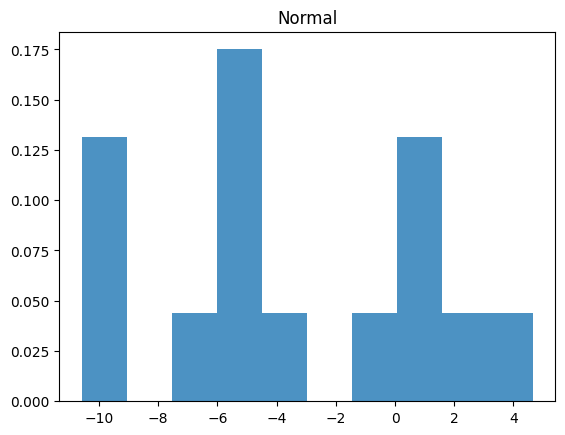

In [4]:
sample = np.random.normal(-5, 8, 15)

print(sample)
# создание диаграммы
plt.hist(sample, density=True, histtype='stepfilled', alpha=0.8)
plt.title('Normal')
plt.show()

In [11]:
# Вычисляем критическое значение
z = stats.norm.ppf((1 + y) / 2)

# Вычисляем интервальную оценку
lower_bound = a - z * (std_dev / math.sqrt(n))
upper_bound = a + z * (std_dev / math.sqrt(n))

print("Доверительный интервал для математического ожидания: ({}, {})".format(lower_bound, upper_bound))

Доверительный интервал для математического ожидания: (-10.320610130836235, 0.3206101308362346)


In [12]:
def confidence_interval(data, confidence=0.99):
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    t = stats.t.ppf((1 + confidence) / 2, n - 1)
    lower_bound = sample_mean - t * sample_std / np.sqrt(n)
    upper_bound = sample_mean + t * sample_std / np.sqrt(n)
    return (lower_bound, upper_bound)

# Пример использования
data = np.random.normal(loc=-5, scale=8, size=15)
interval = confidence_interval(data)

print("Доверительный интервал для математического ожидания: ({}, {})".format(interval[0], interval[1]))

Доверительный интервал для математического ожидания: (-11.627211603659768, -1.1252242675662583)


In [14]:
# Степени свободы для распределения хи-квадрат
degrees_of_freedom = n - 1

# Вычисляем критические значения для хи-квадрат распределения
chi2_lower = stats.chi2.ppf((1 - y) / 2, df=degrees_of_freedom)
chi2_upper = stats.chi2.ppf((1 + y) / 2, df=degrees_of_freedom)

# Вычисляем интервальную оценку для дисперсии
variance_estimate = np.var(sample, ddof=1)
variance_lower = (n - 1) * variance_estimate / chi2_upper
variance_upper = (n - 1) * variance_estimate / chi2_lower

# Выводим результат
print("Доверительный интервал для дисперсии:", variance_lower, variance_upper)

Доверительный интервал для дисперсии: 10.631902398852226 81.72044932769046


In [13]:
def confidence_interval_variance(data, confidence=0.99):
    n = len(data)
    sample_var = np.var(data, ddof=1)
    chi2_lower = stats.chi2.ppf((1 - confidence) / 2, n - 1)
    chi2_upper = stats.chi2.ppf((1 + confidence) / 2, n - 1)
    lower_bound = (n - 1) * sample_var / chi2_upper
    upper_bound = (n - 1) * sample_var / chi2_lower
    return (lower_bound, upper_bound)

# Пример использования
data = np.random.normal(loc=3, scale=13, size=15)
interval = confidence_interval_variance(data)

print("Доверительный интервал для дисперсии: ({}, {})".format(interval[0], interval[1]))

Доверительный интервал для дисперсии: (73.55358140049984, 565.3580606946323)


In [17]:
# Функция для расчета длины доверительного интервала для мат. ожидания
def confidence_interval_length_mean(n, std_dev, a):
    z = stats.norm.ppf(1 - a/2)
    length = 2 * z * (std_dev / np.sqrt(n))
    return length

# Функция для расчета длины доверительного интервала для дисперсии
def confidence_interval_length_variance(n, a):
    chi2_lower = stats.chi2.ppf(a/2, df=n-1)
    chi2_upper = stats.chi2.ppf(1 - a/2, df=n-1)
    length = (n-1) / chi2_upper - (n-1) / chi2_lower
    return length

In [24]:
# Параметры
data = np.arange(10, 1000, 10)
alpha = 0.01
sigma = 8

In [25]:
# Расчет длины доверительного интервала для мат. ожидания
lengths_mean = [confidence_interval_length_mean(n, sigma, alpha) for n in data]

# Расчет длины доверительного интервала для дисперсии
lengths_variance = [confidence_interval_length_variance(n, alpha) for n in data]

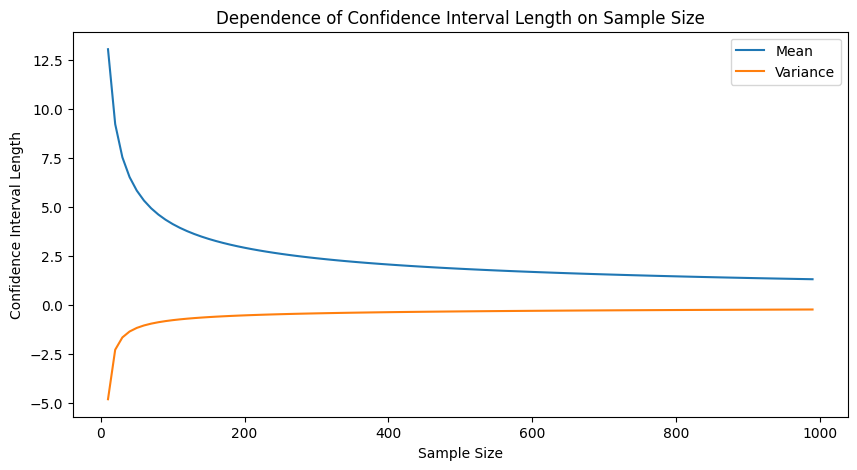

In [26]:
# Построение графиков
plt.figure(figsize=(10, 5))
plt.plot(data, lengths_mean, label='Mean')
plt.plot(data, lengths_variance, label='Variance')
plt.xlabel('Sample Size')
plt.ylabel('Confidence Interval Length')
plt.title('Dependence of Confidence Interval Length on Sample Size')
plt.legend()
plt.show()

In [19]:
# Функция для расчета длины доверительного интервала для мат. ожидания
def confidenceintervallengthmean(n, sigma, alpha):
    z = stats.norm.ppf(1 - alpha/2)
    length = 2 * z * (sigma / np.sqrt(n))
    return length

# Функция для расчета длины доверительного интервала для дисперсии
def confidenceintervallengthvariance(n, alpha):
    chi2lower = stats.chi2.ppf(alpha/2, df=n-1)
    chi2upper = stats.chi2.ppf(1 - alpha/2, df=n-1)
    length = (n-1) / chi2upper - (n-1) / chi2lower
    return length

In [30]:
# Параметры
data = np.arange(10, 1000, 10)
alpha = 0.01
sigma = 8

In [31]:
# Расчет длины доверительного интервала для мат. ожидания
lengthsmean = [confidenceintervallengthmean(n, sigma, alpha) for n in data]

# Расчет длины доверительного интервала для дисперсии
lengthsvariance = [confidenceintervallengthvariance(n, alpha) for n in data]

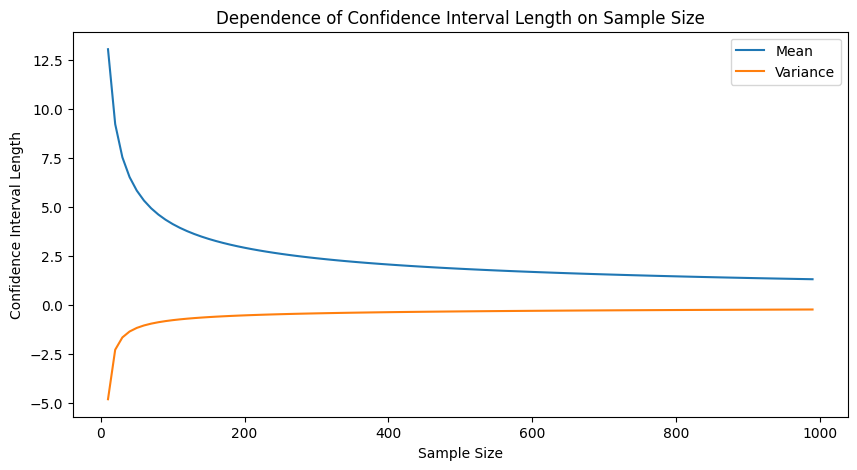

In [32]:
# Построение графиков
plt.figure(figsize=(10, 5))
plt.plot(data, lengthsmean, label='Mean')
plt.plot(data, lengthsvariance, label='Variance')
plt.xlabel('Sample Size')
plt.ylabel('Confidence Interval Length')
plt.title('Dependence of Confidence Interval Length on Sample Size')
plt.legend()
plt.show()

In [34]:
# Задаем параметры нормального распределения
mu = -5
sigma = 8

# Генерируем 2100 выборок из нормального распределения
n_samples = 2100
sample_size = 15
samples = np.random.normal(mu, sigma, (n_samples, sample_size))

In [35]:
# Считаем выборочное среднее и стандартную ошибку для каждой выборки
sample_means = samples.mean(axis=1)
standard_errors = samples.std(axis=1, ddof=1) / np.sqrt(sample_size)

# Строим доверительные интервалы с надежностью 0.99
confidence_level = 0.99
z = stats.norm.ppf((1 + confidence_level) / 2)
lower_bound = sample_means - z * standard_errors
upper_bound = sample_means + z * standard_errors

# Выводим первые 10 доверительных интервалов
for i in range(10):
    print(f"Интервальная оценка для выборки {i+1}: ({lower_bound[i]}, {upper_bound[i]})")

Интервальная оценка для выборки 1: (-12.465391331865215, -1.1248086092538596)
Интервальная оценка для выборки 2: (-12.445574296769298, -1.1131188066919444)
Интервальная оценка для выборки 3: (-12.323022588222994, -2.0987431002725137)
Интервальная оценка для выборки 4: (-13.115320462257916, -0.5544754481361194)
Интервальная оценка для выборки 5: (-8.41806186889906, 2.6116556261510344)
Интервальная оценка для выборки 6: (-8.285285303120643, 1.0824832578090198)
Интервальная оценка для выборки 7: (-10.731083490429118, 0.7175596212557105)
Интервальная оценка для выборки 8: (-17.52561622981559, -2.7797967665507795)
Интервальная оценка для выборки 9: (-11.40972918088929, -1.8111516226522912)
Интервальная оценка для выборки 10: (-10.764565013379324, -3.9026283599702665)


In [36]:
# Находим точечную оценку для математического ожидания
mean_estimate = np.mean(sample_means)

print(f"Точечная оценка для математического ожидания с надежностью 0.99: {mean_estimate}")

Точечная оценка для математического ожидания с надежностью 0.99: -5.049383799695694


In [37]:
# Задаем параметры нормального распределения
mu = -5
sigma = 8

# Генерируем 2100 выборок из нормального распределения
n_samples = 2100
sample_size = 15
samples = np.random.normal(mu, sigma, (n_samples, sample_size))

In [6]:
# Заданные параметры
gamma = 0.99  # уровень доверия

# Размер выборки
n = len(sample)

# Вычисляем выборочное среднее и стандартное отклонение
mean = np.mean(sample)
std_dev = np.std(sample, ddof=1)  # испольщуем исправленное стандартное отклонение для расчета доверительного интервала

# Находим квантили распределения Стьюдента
t = stats.t.ppf((1 + gamma) / 2, df=n - 1)

# Находим доверительный интервал
margin_of_error = t * std_dev / np.sqrt(n)
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Доверительный интервал для математического ожидания:", confidence_interval)

Доверительный интервал для математического ожидания: (-11.938549486617509, 0.16653681681605192)


In [7]:
alpha = 1 - 0.99  # уровень значимости
n = len(sample)  # размер выборки
s2 = np.var(sample, ddof=1)  # выборочная дисперсия

# определение интервала
left = (n - 1) * s2 / stats.chi2.ppf(1 - alpha/2, n - 1)
right = (n - 1) * s2 / stats.chi2.ppf(alpha/2, n - 1)

print("Интервал для дисперсии при уровне значимости {0}: ({1}, {2})".format(alpha, round(left, 2), round(right, 2)))

Интервал для дисперсии при уровне значимости 0.010000000000000009: (27.72, 213.05)
